# Libraries and Data Load

## Load Libraries

In [1]:
######################################################Initial Packages########################################################
#Basic Operating System Stuff
import os
import gc #garbage collector
import random #random seed generator
import pandas_profiling # requires import and prior install 

#Timer
from timeit import default_timer as timer #import a timer

#Basic dataframe, array, and math stuff
import pandas as pd #data frame
from pandas_profiling import ProfileReport
import math #math functions
import numpy as np    #numerical package
from patsy import dmatrix, demo_data, ContrastMatrix, Poly

#Scikit learn
from math import sqrt
import sklearn as sk  #scikit learn
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample #sampling
from sklearn.model_selection import train_test_split as tts, KFold #train test split
from sklearn.decomposition import PCA #principal components
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique
from sklearn.metrics import classification_report as CR,confusion_matrix, roc_curve, plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, average_precision_score #for 2-class model
from sklearn.preprocessing import MinMaxScaler as Scaler, StandardScaler as Scaler2, PolynomialFeatures as poly # used for variable scaling data
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier as RFC, ExtraTreesClassifier as ETC, GradientBoostingClassifier as GBC,AdaBoostClassifier as ABC  # Random Forest package
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import make_pipeline


from scipy import misc, stats as st #Lots of stuff here
import itertools

import statsmodels.api as sm
import pyreadstat

#Graphing
import seaborn as sns
import pydot  #For model plotting
import graphviz #python-graphviz package
from IPython.display import SVG #Same here
import matplotlib.pyplot as plt #plotting
import matplotlib #image save
from matplotlib.pyplot import imshow #Show images
from PIL import Image #Another image utility
import cv2 #more image utilities

%matplotlib inline

os.chdir('D:\Bankrupt')
##############################################################################################################################

## Load Data

In [2]:
##############################################################################################################################
mydata=pd.read_csv('bankrupt.csv')
mydata.dtypes
##############################################################################################################################

Bankrupt                              int64
Medical_Center                        int64
For_Profit                            int64
Government                            int64
Sole_Community_Hospital               int64
Market_Concentration                float64
Case_Mix_Index                      float64
Hospital_Compare                    float64
Staffed_Beds                        float64
Urban                                 int64
HCAHPS_Recommend                    float64
HCAHPS_Star_Rating                  float64
Joint_Commission_Certified          float64
Medicare_Days                       float64
Medicaid_Days                       float64
Other_Pay_Days                      float64
Serious_Complication_Rate           float64
Bed_Utilization_Rate                float64
Facility_Age                        float64
Affiliated_Physicians               float64
Current_Ratio                       float64
Quick_Ratio                         float64
Total_Liabilities               

# Data Preparation

## Determine Shape

In [3]:
mydata.shape

(3222, 34)

## Handle Missing

### Columns

In [4]:
a=mydata.isnull().sum() #count the nulls by column
print(a.sort_values(ascending=False).head(10))

Hospital_Compare             354
HCAHPS_Star_Rating           349
Facility_Age                 322
Debt_Equty_Ratio             308
Medicaid_Days                251
Market_Concentration         235
HCAHPS_Recommend             194
Serious_Complication_Rate    156
Days_Cash_on_Hand             82
Cash_on_Hand                  82
dtype: int64


In [5]:
mydata=mydata.drop(columns=['Hospital_Compare','HCAHPS_Star_Rating'])

### Rows


In [6]:
pd.set_option('display.max_rows', 500)
b=mydata.isnull().sum(axis=1) #count the nulls by column
b=b.sort_values(ascending=False)
#print(b.head(101))

In [7]:
todrop=b.head(101).index
todrop

Int64Index([1903, 3004,  181, 2266, 3046, 3033, 3058, 3043, 2215, 3018,
            ...
            3117, 1170, 3185, 1921, 3184, 1886, 3061, 3216, 1926, 3218],
           dtype='int64', length=101)

## Drop the Rows and Plot Missing

<AxesSubplot:>

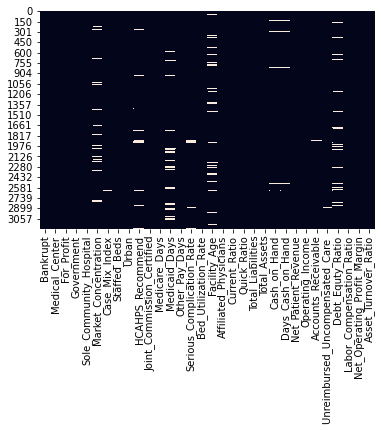

In [8]:
mydata = mydata.drop(todrop)                    
sns.heatmap(mydata.isnull(), cbar=False)

## Impute Median
Given the small number of missing values remaining, impute median.

missing: 0.012976610060877924
(3121, 32)


<AxesSubplot:>

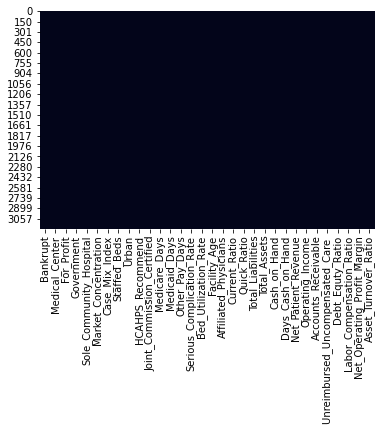

In [9]:
num=mydata.isna().sum().sum()
den=mydata.shape[0]*mydata.shape[1]
print('missing:', num/den)
mydata=mydata.fillna(mydata.median())
print(mydata.shape)
sns.heatmap(mydata.isnull(), cbar=False)

# Describe

In [10]:
mydata.describe()

,Bankrupt,Medical_Center,For_Profit,Government,Sole_Community_Hospital,Market_Concentration,Case_Mix_Index,Staffed_Beds,Urban,HCAHPS_Recommend,...,Cash_on_Hand,Days_Cash_on_Hand,Net_Patient_Revenue,Operating_Income,Accounts_Receivable,Unreimbursed_Uncompensated_Care,Debt_Equty_Ratio,Labor_Compensation_Ratio,Net_Operating_Profit_Margin,Asset_Turnover_Ratio
count,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,3121.000000,...,3.121000e+03,3121.000000,3.121000e+03,3.121000e+03,3.121000e+03,3.121000e+03,3121.000000,3121.000000,3121.000000,3.121000e+03
mean,0.008651,0.057674,0.246395,0.138097,0.150913,0.337217,1.634008,192.706825,0.316565,0.706043,...,2.579284e+07,46.925729,2.992450e+08,-1.275558e+06,1.053796e+08,2.026231e+07,1.121525,0.441804,-0.024559,4.257931e+03
std,0.092623,0.233163,0.430981,0.345057,0.358022,0.313954,0.369343,185.740625,0.465211,0.094472,...,1.381213e+08,141.721323,4.365560e+08,9.132777e+07,1.986983e+08,3.839841e+07,21.448354,0.192061,0.382008,2.377892e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.710000,1.000000,0.000000,0.270000,...,-2.512770e+09,-690.800000,-6.128715e+07,-1.191563e+09,-8.254052e+07,-2.191300e+04,-179.250000,-4.400000,-8.350000,-6.943627e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,1.410000,61.000000,0.000000,0.650000,...,1.997000e+04,0.100000,7.168700e+07,-9.441068e+06,1.860238e+07,4.249462e+06,0.010000,0.340000,-0.090000,7.227683e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.235000,1.590000,135.000000,0.000000,0.710000,...,1.822325e+06,9.600000,1.616667e+08,3.820900e+04,4.553871e+07,1.009541e+07,0.200000,0.420000,0.000000,1.087797e+00
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.510000,1.800000,261.000000,1.000000,0.770000,...,1.384459e+07,44.500000,3.505475e+08,1.537864e+07,1.120814e+08,2.235255e+07,0.640000,0.520000,0.080000,1.634982e+00
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.260000,2247.000000,1.000000,1.000000,...,3.880477e+09,2318.000000,5.951047e+09,1.218900e+09,3.711121e+09,6.791545e+08,741.950000,3.490000,13.030000,1.328431e+07


# Build Training and Test Set, Oversample, Scale

In [11]:
##############################################################################################################################
# Seed value for random number generators to obtain reproducible results
from imblearn.over_sampling import SMOTE
temp=mydata
temp=temp.values
tempy=temp[:,0].astype('int')
tempx=temp[:,1:len(temp)]

X_train, X_test, y_train, y_test = tts(tempx, tempy, test_size=.5, random_state=31)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

#myscaler=Scaler()
myscaler=Scaler2()
tmp=myscaler.fit(X_train)
X_train=tmp.fit_transform(X_train)
X_test=tmp.fit_transform(X_test)
print(X_train.shape, X_test.shape)
print(np.unique(y_train,return_counts=True), np.unique(y_test, return_counts=True))

##############################################################################################################################

(3094, 31) (1561, 31)
(array([0, 1]), array([1547, 1547], dtype=int64)) (array([0, 1]), array([1547,   14], dtype=int64))


# Functions for Confusion Matrix and PR Plot

In [12]:
def myf(mod):
    y_hat=mod.predict(X_test).astype(int) #can use either encoded or decoded data..doesn't help
    results=pd.DataFrame(CR(y_test, y_hat, output_dict=True))
    try:  
        plot_confusion_matrix(mod,X_test,y_test)
    except:
        print('No confusion plot.')
    return(results)

def prplot(mod):
    average_precision = average_precision_score(y_test, mod.predict(X_test))
    disp = plot_precision_recall_curve(mod, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Logistic Regression Models

                     0          1  accuracy    macro avg  weighted avg
precision     0.997275   0.023913  0.710442     0.510594      0.988545
recall        0.709761   0.785714  0.710442     0.747738      0.710442
f1-score      0.829305   0.046414  0.710442     0.437859      0.822284
support    1547.000000  14.000000  0.710442  1561.000000   1561.000000


,LR_coef,LR_abscoef
Affiliated_Physicians,4.736537,4.736537
Unreimbursed_Uncompensated_Care,-4.225451,4.225451
Net_Patient_Revenue,-4.005939,4.005939
HCAHPS_Recommend,-3.327791,3.327791
Joint_Commission_Certified,-2.710910,2.710910
Staffed_Beds,-2.285742,2.285742
Accounts_Receivable,-2.007341,2.007341
Current_Ratio,-1.991191,1.991191
Government,-1.708412,1.708412
Medicaid_Days,1.698670,1.698670


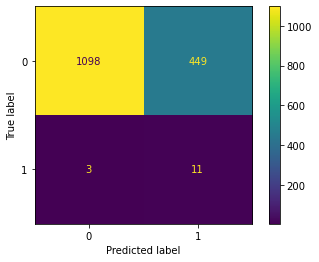

In [13]:
##############################################################################################################################
mylr=LR(fit_intercept = True) #logistic model
mylr.fit(X_train, y_train)  #Fit on training data 
print(myf(mylr)) #predict on test set and plot
feature_names = mydata.columns[1:len(mydata)]
lrdf=pd.DataFrame(np.squeeze(mylr.coef_), columns=['LR_coef'])
lrdf.index=np.squeeze(feature_names)
lrdf['LR_abscoef']=abs(lrdf['LR_coef'])
lrdf.sort_values(by=['LR_abscoef'], ascending=False)
##############################################################################################################################

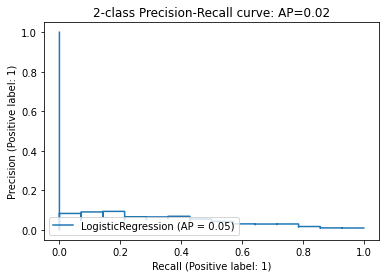

In [14]:
prplot(mylr)

## SGD Classifier

                     0          1  accuracy    macro avg  weighted avg
precision     0.996575   0.025445  0.752082     0.511010      0.987866
recall        0.752424   0.714286  0.752082     0.733355      0.752082
f1-score      0.857459   0.049140  0.752082     0.453299      0.850209
support    1547.000000  14.000000  0.752082  1561.000000   1561.000000


,SGD_coef,SGD_abscoef
Net_Patient_Revenue,-10.357011,10.357011
Unreimbursed_Uncompensated_Care,-9.493691,9.493691
Affiliated_Physicians,9.038825,9.038825
Joint_Commission_Certified,-8.037130,8.037130
Government,-6.661039,6.661039
HCAHPS_Recommend,-4.942562,4.942562
Current_Ratio,-4.775227,4.775227
Quick_Ratio,4.572574,4.572574
Accounts_Receivable,-4.093048,4.093048
Total_Assets,-4.018205,4.018205


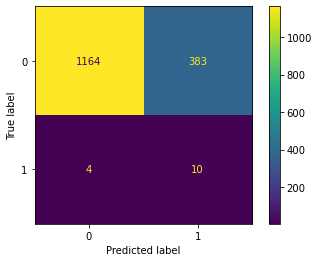

In [15]:
mysgd=SGD(loss='hinge', fit_intercept=True, random_state=43)
mysgd.fit(X_train,y_train)
print(myf(mysgd))
sgddf=pd.DataFrame(np.squeeze(mysgd.coef_), columns=['SGD_coef'])
sgddf.index=np.squeeze(feature_names)
sgddf['SGD_abscoef']=abs(sgddf['SGD_coef'])
sgddf.sort_values(by=['SGD_abscoef'], ascending=False)

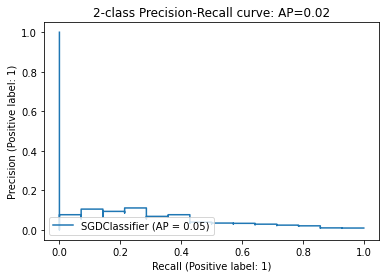

In [16]:
prplot(mysgd)

# Tree Models

## Tree Plots

In [17]:
def mytree(mod):
    imp, std=mod.feature_importances_, np.std([mod.feature_importances_ for tree in mod.estimators_], axis=0)
    importances = pd.Series(imp, index=mydata.columns[1:58]).sort_values(ascending=False)[0:20]
    fig, ax = plt.subplots()
    importances.plot.bar(yerr=std[0:20], ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

## Random Forest Classifier

                     0          1  accuracy    macro avg  weighted avg
precision     0.995763   0.016207  0.608584     0.505985      0.986977
recall        0.607628   0.714286  0.608584     0.660957      0.608584
f1-score      0.754717   0.031696  0.608584     0.393206      0.748232
support    1547.000000  14.000000  0.608584  1561.000000   1561.000000


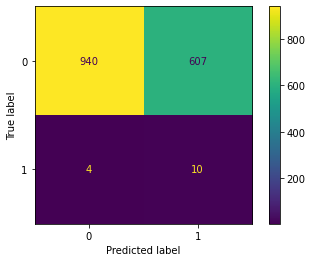

In [18]:
##############################################################################################################################
myrf=RFC(n_estimators = 1000,max_depth=3,min_samples_split=2, criterion='entropy',bootstrap=True,                   
                            n_jobs = -1, random_state = 64) #RF Model
myrf.fit(X_train, y_train)  # Fit on the training set 
print(myf(myrf))
##############################################################################################################################

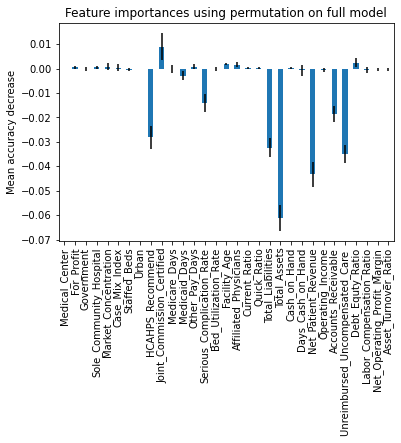

In [19]:
from sklearn.inspection import permutation_importance
result = permutation_importance(myrf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
#fig.tight_layout()
plt.show()

In [20]:
rfdf=pd.DataFrame(result.importances_mean, columns=['RF_coef'])
rfdf.index=feature_names
rfdf['RF_abscoef']=abs(rfdf['RF_coef'])
rfdf.sort_values(by=['RF_abscoef'], ascending=False)

,RF_coef,RF_abscoef
Total_Assets,-0.060987,0.060987
Net_Patient_Revenue,-0.043177,0.043177
Unreimbursed_Uncompensated_Care,-0.035042,0.035042
Total_Liabilities,-0.032351,0.032351
HCAHPS_Recommend,-0.028123,0.028123
Accounts_Receivable,-0.018578,0.018578
Serious_Complication_Rate,-0.014158,0.014158
Joint_Commission_Certified,0.008969,0.008969
Medicaid_Days,-0.002947,0.002947
Debt_Equty_Ratio,0.002370,0.002370


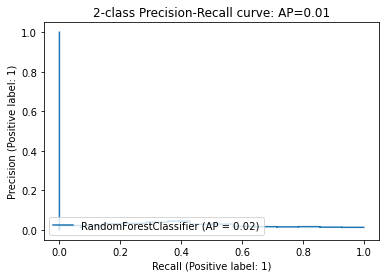

In [21]:
prplot(myrf)

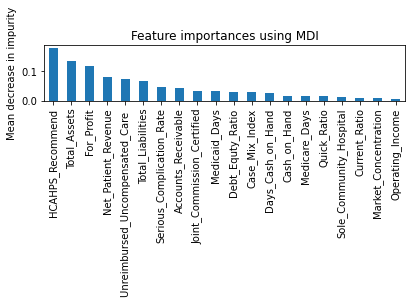

In [22]:
mytree(myrf)

## Extra Trees Classifier

,0,1,accuracy,macro avg,weighted avg
precision,0.995927,0.017271,0.632928,0.506599,0.987150
recall,0.632191,0.714286,0.632928,0.673239,0.632928
f1-score,0.773428,0.033727,0.632928,0.403578,0.766794
support,1547.000000,14.000000,0.632928,1561.000000,1561.000000


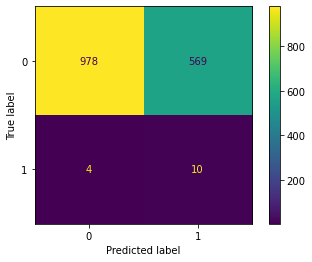

In [23]:
##############################################################################################################################
myextra=ETC(n_estimators = 1000, max_depth=5, min_samples_split=5,criterion='entropy',
                           bootstrap=True, n_jobs = -1, random_state = 64) #previously tuned
myextra.fit(X_train, y_train)  #Fit on training set
myf(myextra)
#######################################################

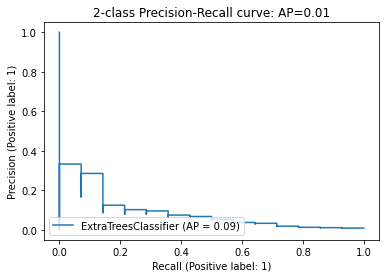

In [24]:
prplot(myextra)

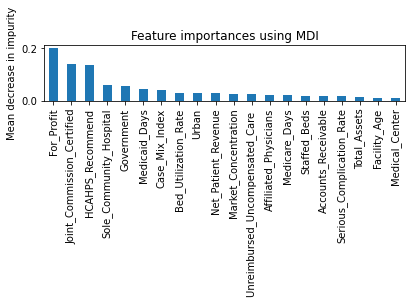

In [25]:
mytree(myextra)

In [26]:
etdf=pd.DataFrame(myextra.feature_importances_, columns=['ET_coef'])
etdf.index=feature_names
etdf['ET_abscoef']=abs(etdf['ET_coef'])
etdf.sort_values(by=['ET_abscoef'], ascending=False)

,ET_coef,ET_abscoef
For_Profit,0.201207,0.201207
Joint_Commission_Certified,0.138874,0.138874
HCAHPS_Recommend,0.137211,0.137211
Sole_Community_Hospital,0.059304,0.059304
Government,0.055079,0.055079
Medicaid_Days,0.044743,0.044743
Case_Mix_Index,0.039321,0.039321
Bed_Utilization_Rate,0.030772,0.030772
Urban,0.028116,0.028116
Net_Patient_Revenue,0.027946,0.027946


##  Extreme Gradient Boosting

[08:43:55] WARNING: ..\src\learner.cc:573: 
Parameters: { "max_depth" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,0,1,accuracy,macro avg,weighted avg
precision,0.997331,0.025172,0.725176,0.511251,0.988612
recall,0.724628,0.785714,0.725176,0.755171,0.725176
f1-score,0.839386,0.048780,0.725176,0.444083,0.832295
support,1547.000000,14.000000,0.725176,1561.000000,1561.000000


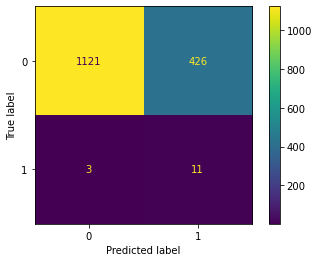

In [27]:
##############################################################################################################################
import xgboost
myGBC = xgboost.XGBClassifier(random_state=7,use_label_encoder=False, max_depth=3, booster='gblinear')
myGBC.fit(X_train, y_train)  #Fit on training set
myf(myGBC)
##############################################################################################################################

In [28]:
xgbdf=pd.DataFrame(myGBC.coef_, columns=['XGB_coef'])
xgbdf.index=feature_names
xgbdf['XGB_abscoef']=abs(xgbdf['XGB_coef'])
xgbdf.sort_values(by=['XGB_abscoef'], ascending=False)


,XGB_coef,XGB_abscoef
Net_Patient_Revenue,-11.184100,11.184100
Affiliated_Physicians,9.050230,9.050230
Unreimbursed_Uncompensated_Care,-8.949980,8.949980
HCAHPS_Recommend,-4.379250,4.379250
Total_Assets,-3.559580,3.559580
Joint_Commission_Certified,-3.337180,3.337180
Cash_on_Hand,3.177120,3.177120
Staffed_Beds,-2.415430,2.415430
Operating_Income,-2.175610,2.175610
Bed_Utilization_Rate,-2.151750,2.151750


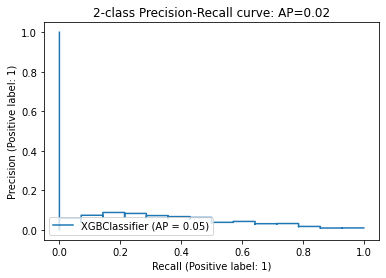

In [29]:
prplot(myGBC)

# Neural Network

                     0          1  accuracy    macro avg  weighted avg
precision     0.996724   0.029412  0.786035     0.513068      0.988049
recall        0.786684   0.714286  0.786035     0.750485      0.786035
f1-score      0.879335   0.056497  0.786035     0.467916      0.871956
support    1547.000000  14.000000  0.786035  1561.000000   1561.000000


,NN_coef,NN_abscoef
Affiliated_Physicians,42.206754,42.206754
Net_Patient_Revenue,-37.672752,37.672752
Unreimbursed_Uncompensated_Care,-34.390473,34.390473
Current_Ratio,-29.565538,29.565538
Government,-26.331804,26.331804
HCAHPS_Recommend,-25.673171,25.673171
Total_Assets,-20.760000,20.760000
Medical_Center,-18.933191,18.933191
Staffed_Beds,-17.829490,17.829490
Joint_Commission_Certified,-17.234020,17.234020


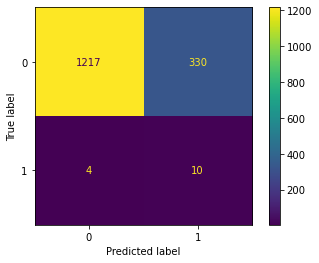

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
#nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1,3,6), random_state=1)
nn=Perceptron(random_state=1)
nn.fit(X_train, y_train)
print(myf(nn))
nndf=pd.DataFrame(np.squeeze(nn.coef_), columns=['NN_coef'])
nndf.index=np.squeeze(feature_names)
nndf['NN_abscoef']=abs(nndf['NN_coef'])
nndf.sort_values(by=['NN_abscoef'], ascending=False)

In [31]:
total=pd.concat([lrdf, sgddf,nndf,rfdf,etdf,xgbdf], axis=1)
total=total.drop(columns=['LR_abscoef','SGD_abscoef', 'RF_abscoef','ET_abscoef', 'XGB_abscoef', 'NN_abscoef'])
total

,LR_coef,SGD_coef,NN_coef,RF_coef,ET_coef,XGB_coef
Medical_Center,-1.257346,-3.653578,-18.933191,0.000000,0.010465,-1.874970
For_Profit,0.566860,0.515383,1.302619,0.000577,0.201207,0.651836
Government,-1.708412,-6.661039,-26.331804,-0.000064,0.055079,-2.070700
Sole_Community_Hospital,0.094782,-0.538951,1.414965,0.000512,0.059304,-0.283876
Market_Concentration,-0.124315,0.463867,-0.012025,0.000833,0.025691,-0.128890
Case_Mix_Index,-0.382925,0.618150,0.550426,0.000320,0.039321,0.034885
Staffed_Beds,-2.285742,-3.038259,-17.829490,-0.000512,0.017542,-2.415430
Urban,-0.000284,0.112379,-3.367978,0.000000,0.028116,0.108336
HCAHPS_Recommend,-3.327791,-4.942562,-25.673171,-0.028123,0.137211,-4.379250
Joint_Commission_Certified,-2.710910,-8.037130,-17.234020,0.008969,0.138874,-3.337180
